# Распознавание образов #5
#### Напылов Евгений 381806-2

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x_data = torch.tensor([[1.], [2.05], [3.]], requires_grad=False)
y_data = torch.tensor([[2.], [4.], [6.]], requires_grad=False)

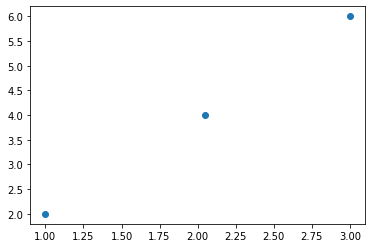

In [3]:
plt.scatter(x_data, y_data)

In [4]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    
    def __repr__(self):
        repr = ""
        for name, param in self.named_parameters():
            if param.requires_grad:
                repr += f'{name} {param.data}\n'
        return repr
    
    def get_a_b(self):
        params = []
        for p in self.parameters(): 
            params.append(p.item())
        return params
    
    def fit(self, N_epoch, eps, criterion, optimizer, x_data, y_data):
        loss_arr = []
        loss_last = -1000
        for e in range(N_epoch):
            pred_y = model(x_data)
            loss = criterion(pred_y, y_data)
            loss_arr.append(loss)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            print(e, loss.item())
            if abs(loss.item() - loss_last) < eps: break
            loss_last = loss.item()
        return loss_arr



In [5]:
model = LinearRegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

**До обучения**

In [6]:
model

linear.weight tensor([[0.6521]])
linear.bias tensor([0.1173])

In [7]:
pred_y = model(x_data)
loss = criterion(pred_y, y_data)
loss.item()

7.804359436035156

**Обучение**

In [8]:
%%time
loss_arr = model.fit(N_epoch=300,
                     eps=1e-7,
                     criterion=criterion,
                     optimizer=optimizer,
                     x_data=x_data,
                     y_data=y_data)

0 7.804359436035156
1 6.173231601715088
2 4.7440185546875
3 3.5187923908233643
4 2.4972586631774902
5 1.6760644912719727
6 1.0480419397354126
7 0.6014550924301147
8 0.31943920254707336
9 0.17982740700244904
10 0.15564030408859253
11 0.21642495691776276
12 0.3304300606250763
13 0.4673144817352295
14 0.6008303761482239
15 0.7108802199363708
16 0.7845516204833984
17 0.8160578608512878
18 0.8058163523674011
19 0.7590141892433167
20 0.6840019226074219
21 0.59075528383255
22 0.48954638838768005
23 0.3898729383945465
24 0.2996688783168793
25 0.2247811108827591
26 0.16870498657226562
27 0.13256290555000305
28 0.11530455201864243
29 0.11409948021173477
30 0.1248718723654747
31 0.14291639626026154
32 0.16351716220378876
33 0.1824953556060791
34 0.1966245174407959
35 0.20387320220470428
36 0.20346522331237793
37 0.19577674567699432
38 0.18210327625274658
39 0.16434897482395172
40 0.14468814432621002
41 0.12524180114269257
42 0.10781198740005493
43 0.09369315952062607
44 0.08357598632574081
45 0.0

**После обучения**

In [9]:
model

linear.weight tensor([[1.9973]])
linear.bias tensor([-0.0276])

In [10]:
pred_y = model(x_data)
loss = criterion(pred_y, y_data)
loss.item()

0.0022211880423128605

**График падения ошибки**

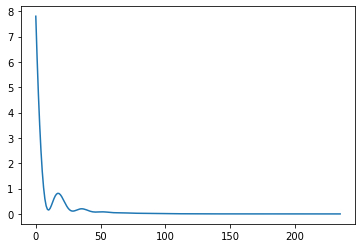

In [11]:
xx = list(range(len(loss_arr)))
yy = [l.item() for l in loss_arr]
plt.plot(xx, yy)

**График полученной прямой**

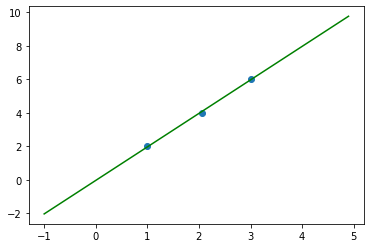

In [12]:
params_a_b = model.get_a_b()
xx = list(np.arange(-1, 5, 0.1))
yy = [params_a_b[0]*x+params_a_b[1] for x in xx]
plt.plot(xx, yy, c='g')
plt.scatter(x_data, y_data)
plt.show()